In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


## 캘리포니아 데이터 다운로드 받아서 읽어보기

### 1-1 캘리포니아 데이터 다운로드
* kaggle : claifornia housing prices

### 1-2 Data Analysis
* 데이터 자료형 확인하기
* 앞의 데이터 5행 확인하기
* 뒤의 데이터 5행 확인하기
* 데이터 요약값 확인하기
* 데이터 결측치 확인하기

##### 01. 데이터 자료형 확인하기

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
test = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_test.csv", sep=",")
train.shape, test.shape

((17000, 9), (3000, 9))

In [4]:
train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

##### 02. 앞의 데이터 5행 확인하기

In [5]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


##### 03. 뒤의 데이터 5행 확인하기

In [6]:
train.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


##### 04. 데이터 요약값 확인하기

In [8]:
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##### 05. 데이터 결측치 확인하기

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


* int64, float64, category, datetime 자료형이 있다.
* 자료형은 실수형으로 보인다.
* 17,000개와 3,000개의 데이터 중 비어있는 값은 없다.

In [11]:
print(train.isnull().sum())
print( )
print(test.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


* 결측치는 없다.

##### 06. 데이터에 대한 설명
* longitude: A measure of how far west a house is; a higher value is farther west
* latitude: A measure of how far north a house is; a higher value is farther north
* housingMedianAge: Median age of a house within a block; a lower number is a newer building
* totalRooms: Total number of rooms within a block
* totalBedrooms: Total number of bedrooms within a block
* population: Total number of people residing within a block
* households: Total number of households, a group of people residing within a home unit, for a block
* medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
* medianHouseValue: Median house value for households within a block (measured in US Dollars)

##### 07. 데이터 시각화 필요성
* 데이터가 실수(연속형) → Histogram
* Histogram은 데이터가 연속형값의 분포를 보일 때 사용한다.

In [12]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

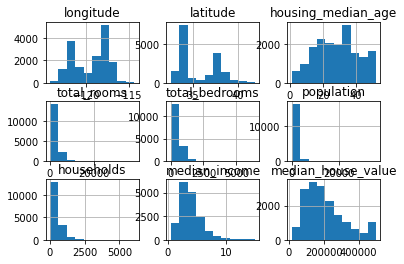

In [13]:
train.hist()

* Pandas는 시각화 기능도 가지고 있다.
* 글씨가 겹쳐 보기 어려우니 크기를 조절해보자.

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

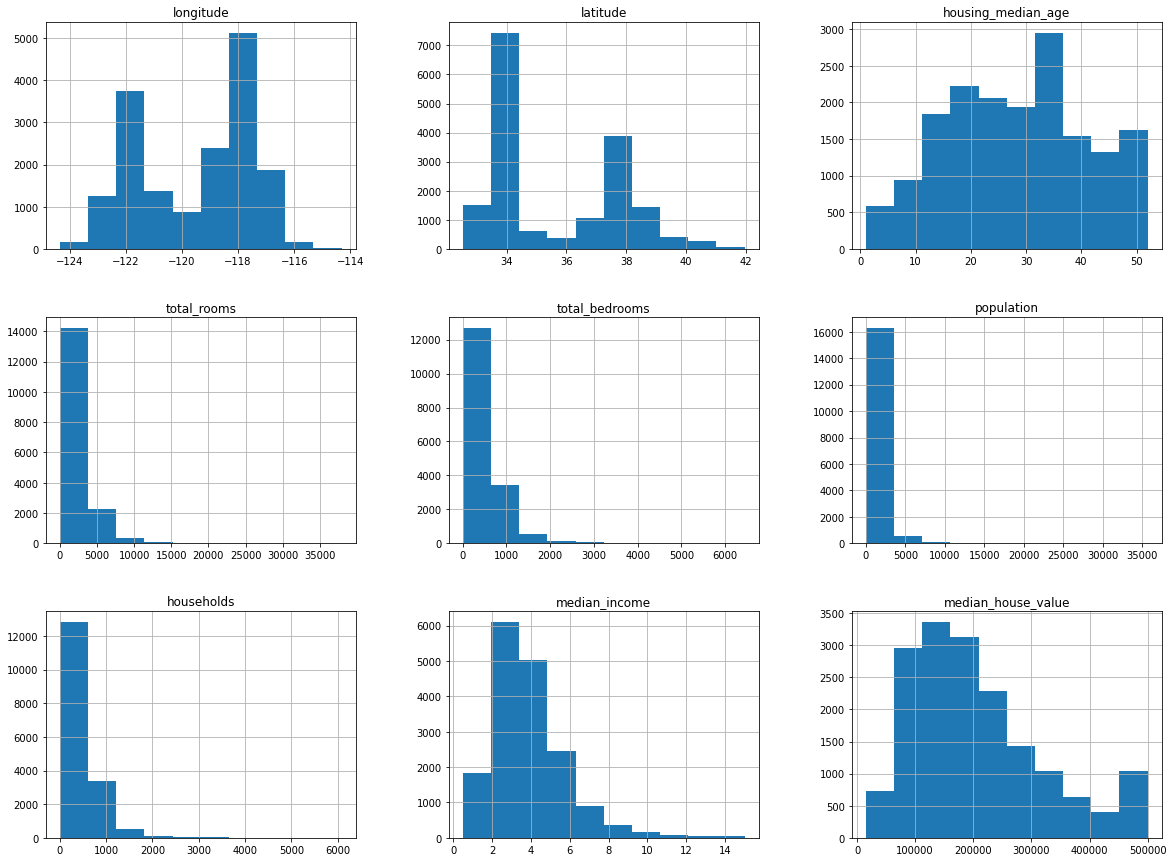

In [14]:
train.hist(figsize=(20,15))

* housing_median_age는 변수가 정규 분포 형태를 띈다.
* latitude(위도)의 범위는 약 33 ~ 34 정도 분포한다.
* longitude(경도)의 범위는 약-125 ~ -114 정도 분포한다.

In [15]:
train['latitude'].describe()

count    17000.000000
mean        35.625225
std          2.137340
min         32.540000
25%         33.930000
50%         34.250000
75%         37.720000
max         41.950000
Name: latitude, dtype: float64

In [16]:
train['longitude'].describe()

count    17000.000000
mean      -119.562108
std          2.005166
min       -124.350000
25%       -121.790000
50%       -118.490000
75%       -118.000000
max       -114.310000
Name: longitude, dtype: float64

##### 08. 위도 / 경도에 따른 산점도 분포

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

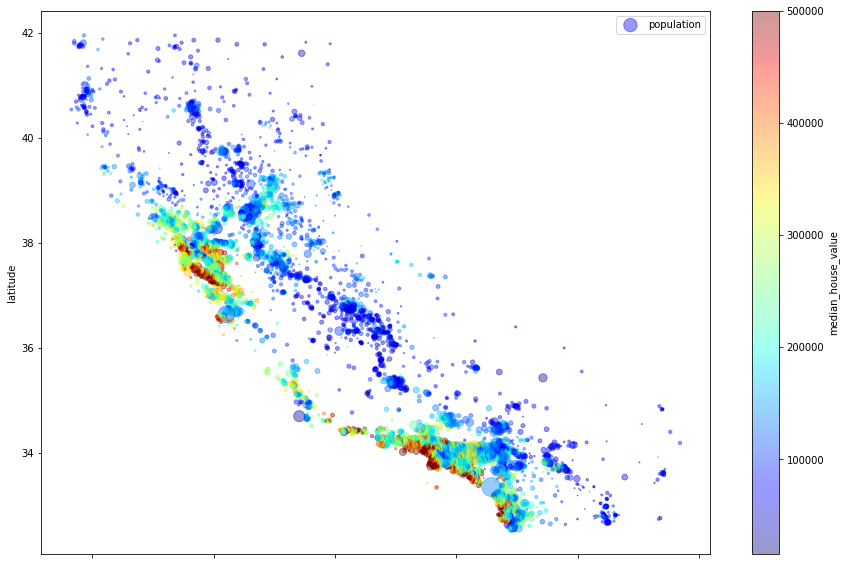

In [17]:
train.plot(kind='scatter',
          x='longitude', y='latitude',
          alpha=0.4, s=train['population']/100,
          label='population', c='median_house_value', figsize=(15,10),
          cmap=plt.get_cmap("jet"), colorbar=True)

In [18]:
train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [19]:
sel=['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

train_n = train[sel]
test_n = test[sel]

print("데이터 선택 확인 : ", train_n.shape, ",", test_n.shape)

데이터 선택 확인 :  (17000, 7) , (3000, 7)


##### 09. 학습용 데이터 셋에 대해 boxplot을 그려보자.

In [20]:
import seaborn as sns

<AxesSubplot:xlabel='median_house_value'>

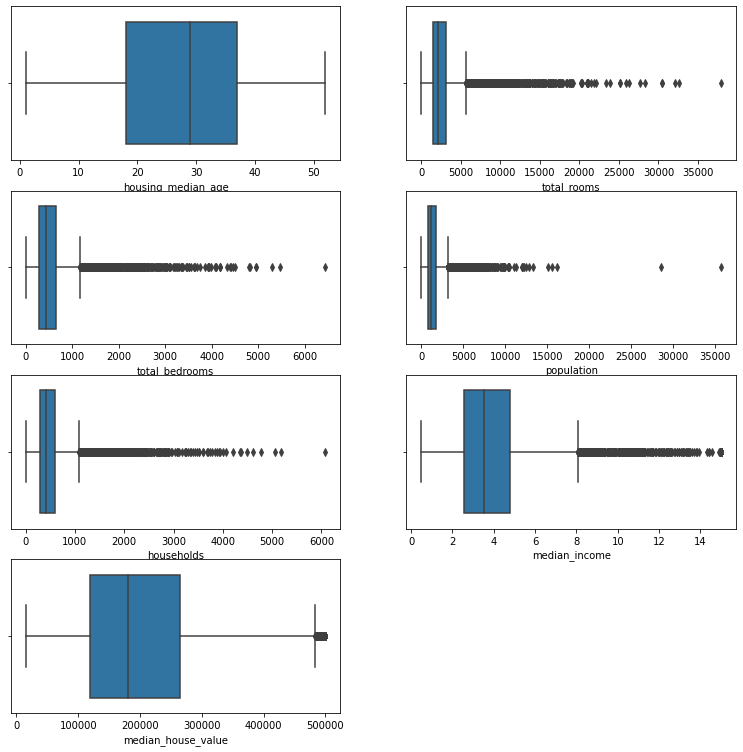

In [21]:
plt.figure(figsize=(13,13))

plt.subplot(4,2,1)
sns.boxplot(x='housing_median_age', data=train_n)

plt.subplot(4,2,2)
sns.boxplot(x='total_rooms', data=train_n)

plt.subplot(4,2,3)
sns.boxplot(x='total_bedrooms', data=train_n)

plt.subplot(4,2,4)
sns.boxplot(x='population', data=train_n)

plt.subplot(4,2,5)
sns.boxplot(x='households', data=train_n)

plt.subplot(4,2,6)
sns.boxplot(x='median_income', data=train_n)

plt.subplot(4,2,7)
sns.boxplot(x='median_house_value', data=train_n)

##### 10. test 데이터 셋도 알아보기

In [22]:
sel

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

0 housing_median_age
1 total_rooms
2 total_bedrooms
3 population
4 households
5 median_income
6 median_house_value


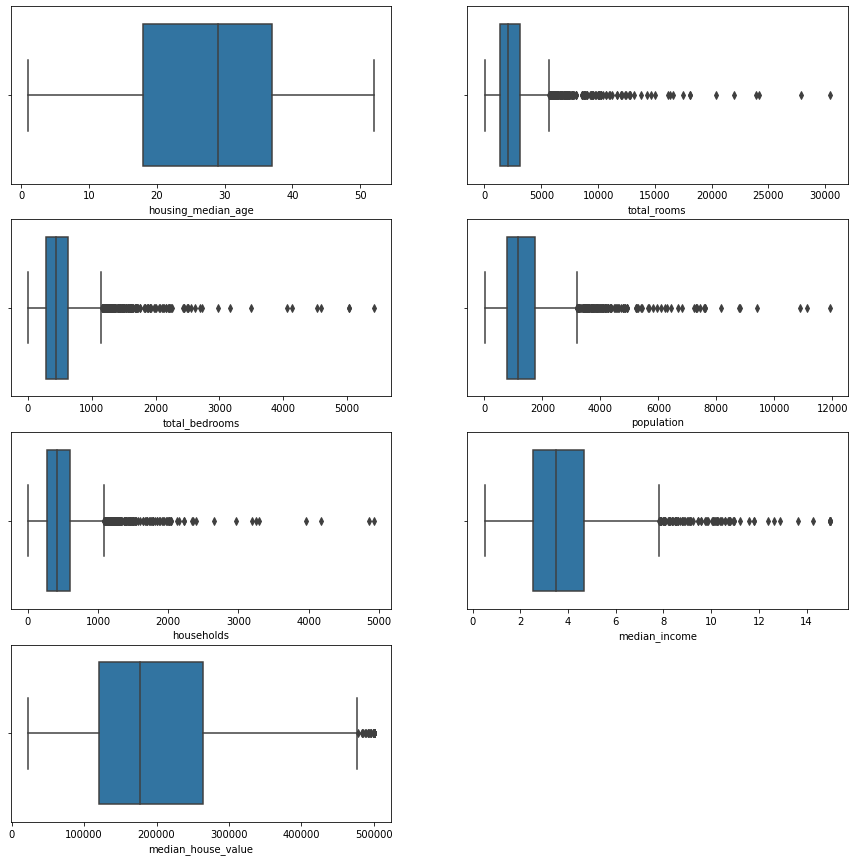

In [23]:
plt. figure(figsize=(15,15))

for idx, item in enumerate(sel):
    print(idx, item)
    plt.subplot(4,2,idx+1)
    sns.boxplot(x=item, data=test_n)